# Trabajo Semanal N°3 : 'Analisis de Fourier: FFT, desparramo, interpolacion y ventaneo'
### Alumno: Magdalena Guida

### APS - 2do cuatrimestre 2025

En el siguiente trabajo se llevara a cabo un analisis espectral, un proceso que consiste en medir, estimar y caracterizar el contenido frecuencial de las señales, con especial foco, en el efecto llamado *desparramo espectral*. Para esto, se generaron 3 senoidales con las siguientes caracteristicas: 
- Frecuencias determinadas como: $f_{0} = k_{0}*\frac{f_{s}}{N} = k_{0}*\varDelta_{f}$
- Potencia normalizada

donde, $k_{0}$ se definio = {$\frac{N}{4};   \frac{N}{4} + \frac{1}{4};    \frac{N}{4} + \frac{1}{2}$}, siendo cada una la frecuencia correpondiente a las tres señales con las que se trabajo : {$ xx; xx2; xx3$}. Sabiendo que la potencia de una señal con *Amplitud* conocida se calcula como $P = \frac{A^{2}}{2}$, y se necesita una potencia normalizada, tal que $P = 1$, defino $A = \sqrt{2}$, para todas las señales. 

El concepto, *ambiguedad espectral*, hace referencia a las dificultades que surgen al interpretar el contenido  frecuencial de una señal, lo que puede conducir a errores en la identificaion de frecuencias, amplitudes o fases. Esta ambiguedad, aparece al transladar herramientas teoricaa, como la DTFT, a su implementacion practica, lo cual implica realizar ciertos ajustes. Dos fuentes principales de ambiguedad espectral son el *ventaneo de datos* y el *muestreo en frecuencia*. 
El *ventaneo de datos*, surge por la necesidad de seleccionar una porcion finita de la señal infinita $x[n]$ para su analisis. Formalmente, equivale a multiplicar la señal, por una ventana de longitud $N$, que representa la cantidad de muestras consideradas, en este caso con una ventana cuadrada. Queda definido como: $\widehat{x}[n] = x[n] w_{N}[n]$. Esta operacion puede introducir ambiguedad espectral si no se eligen adecuadamente el tipo de ventana o el valor de $N$. Por otro lado, el *muestreo en frecuencias*, se origina por la necesidad de discretizar el dominio continuo de frecuencias. Al definir  $N$, y una frecuencia de muestreo $f_{s}$,  la resolucion espectral queda determinada por, $\varDelta_{f} = \frac{f_{s}}{N}$. El problema aparece cuando la frecuencia de la señal no completa un numero entero de ciclos dentro de las $N$ muestras, ya que la FFT asume periodicidad de longitud $N$. Esto genera discontinuidades que se traducen como un espectro contaminado por componentes no deseados.
El *desparramo espectral* o *spectral leakage*, es la dispercion de energia en el espectro que genera un nivel de ruido que puede dificultar la medicion de componenetes de baja amplitud. Es una de las formas en que se manifiesta la ambiguedad espectral. 
Uno de las estrategias que se pueden aplicar para reducir el desparramo espectral, es el *zero-padding* o *relleno con ceros*, que consiste alargar la señal de entrada $x(t)$ con ceros antes de calcular su FFT. Es una tecnica muy simple de implementar, que no altera la informacion original, pero si mejora como se presenta en el dominio frecuencial.  

La *Identidad de Parseval* es un principio del analisis de señales que establece la equivalencia energetica entre el domicion temporal y el frecuencial. Aplicado en la practica, se busca que la suma del cuadrado de los componenetes de la amplitud de la señal en el dominio temporal, sea igual a la suma de los cuadrados de los componenetes de su FFT normalizados. Si, ambos toman el mismo valor, o a nivel practico su resta toma un valor lo suficientemente cercano al cero, se puede asegurar que se cumple la identidad de Parseval. Esto, te asegura que hay conservacion de energia, toda la informacion energetica eta contenida en el espectro. Tambien, es una confirmacion de que la FFT de la señal se calculo correctamente. 

A continuacion se presenta el codigo diseñado: 

In [33]:
import numpy as np 
from numpy.fft import fft
from scipy import signal
import matplotlib.pyplot as plt

fs = 1000  # Frecuencia de muestreo
N = 1000   # Número de muestras
ts = 1 / fs  # Tiempo entre muestras correlativas
# tiempo total de muestreo = N*ts = N * 1/fs = 1s
df = fs/N              #resolucion espectral
dc = 0       #Desplazamiento vertical [V]  
ph = 0       #FASE = Desplazamiento horizontal [rad]
ff = 0

# Definicion funciónes seno
def func_sen(Vmax=1, dc=dc, ff=ff, ph=ph, nn=N, fs=fs):
    N= np.arange(nn)
    tt = N/fs
    xx = Vmax * np.sin(2 * np.pi * ff * tt + ph) + dc
    return tt, xx

In [34]:
#%% DEFS FUNCIONES

## SEÑALES SENO
tt, xx = func_sen(ff = N/4 * (fs/N), Vmax = np.sqrt(2))
tt2, xx2 = func_sen(ff= (N/4 + 1/4) *  (fs/N), Vmax = np.sqrt(2) ) 
tt3, xx3 = func_sen(ff = (N/4 + 1/2) * (fs/N), Vmax = np.sqrt(2))

## fft + vector frecuencias
X1_fft = np.abs(np.fft.fft(xx)) 
X2_fft = np.abs(np.fft.fft(xx2))
X3_fft = np.abs(np.fft.fft(xx3))
frecs = np.arange(N) * fs / N

Se define la funcion seno, con todos sus parametros, y se la utiliza para crear las tres señales a analizar, siguiendo las caracteristicas descriptas. Luego, se calcula su FFT y a continuacion se muestran sus graficos.

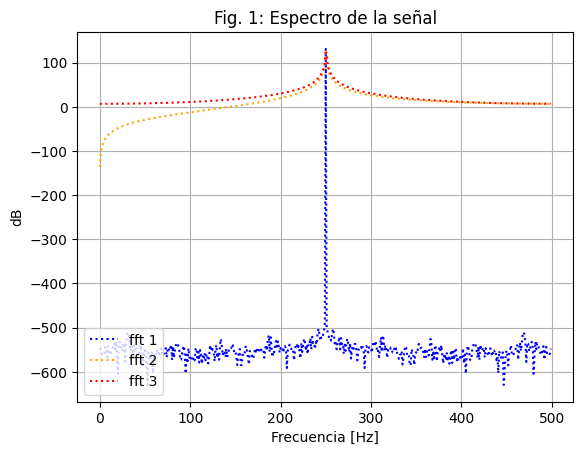

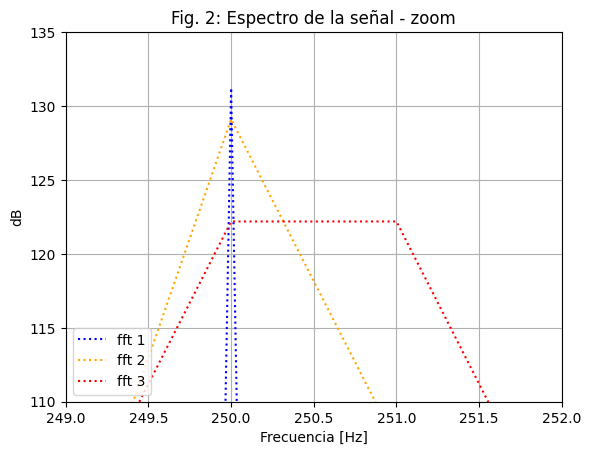

In [14]:
#%% GRAFICO: MODULO

plt.figure()
plt.plot(frecs[:N//2], 10* np.log(X1_fft[:N//2]**2) ,':', color = 'b', label='fft 1')
plt.plot(frecs[:N//2], 10* np.log(X2_fft[:N//2]**2), ':', color = 'orange', label = 'fft 2')
plt.plot(frecs[:N//2], 10* np.log(X3_fft[:N//2]**2), ':', color = 'red', label = 'fft 3')
plt.legend(loc = 'lower left')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('dB')
plt.title('Fig. 1: Espectro de la señal')
plt.grid(True)

plt.figure()
plt.plot(frecs[:N//2], 10* np.log(X1_fft[:N//2]**2) ,':', color = 'b', label='fft 1')
plt.plot(frecs[:N//2], 10* np.log(X2_fft[:N//2]**2), ':', color = 'orange', label = 'fft 2')
plt.plot(frecs[:N//2], 10* np.log(X3_fft[:N//2]**2), ':', color = 'red', label = 'fft 3')
plt.legend(loc = 'lower left')
plt.xlim(249,252)
plt.ylim(110,135)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('dB')
plt.title('Fig. 2: Espectro de la señal - zoom')
plt.grid(True)

En la Fig. 1, vemos el grafico comparativo de la densidad espectral de potencia (PSD) en dB versus Frecuencias para las tres señales senoidales. La Fig. 2, muestra las mismas funciones, pero con la escala ampliada en la region de sus maximos. La FFT 1, corresponde a la linea azul de $f_{1}= 250Hz$, exhibe un pico limpio, estrecho y perfectamente alineado en el valor de su frecuencia teorica. La diferencia entre el valor maximo y el piso de ruido alcanza aproximadamente los $600dB$, lo que indica una frecuencia bien definida y sin desparramo espectral. La segunda funcion, en amarillo correspode a la $f_{2} = 250.25 Hz$, presenta un pico centrado en torno a la frecuencia $250Hz$, pero con mayor anchura y menor altura que el anterior. Aunque,la componenete principal sigue siendo dominante, se observa una dispersion lateral, como la energia se distribuye hacia frecuencias vecinas. Ademas, el piso de ruido se situa al rededor de los $-120dB$, lo que implica una diferencia entre este y su punto mayor de $240dB$. Por ultimo, la funcion roja, que indica la señal con $f_{3} = 250.5 Hz$, se ve un pico que toma valor mas bajo y tiene anchura de $1Hz$. La diferencia con el piso de ruido se reduce a  $120Hz$, lo que evidencia un desparramo espectral mas severo. 

El fenomeno *spectral leakage*, se produce porque los parametros del sistema, en este caso las $N$ muestras y la frecuencia de muestreo $f_{s}$, no son lo suficientemente grandes para que las señales de frecuencias $f_{2}$ y $f_{3}$ completen un numero entero de cclos dentrso de la ventana de analisis. Entonces, como consecuencia, la energia de estas señales se proyecta sobre valores 'vecinos' de frecuencia y se degrada la definicion espectral. 

El *zero-padding*, como se explico anteriormente, es un metodo para mejorar la visualizacion, sin modificar la señal original. Se realizo el mismo analisis, agregandole un vector de $9$ veces el tamaño de $N$ al final de cada señal, con la funcion de *Numpy* : *concat*, que conecta elementos, que deben ser de las mismas dimensiones, secuencialmente. Se las llama=   {$xz; xz2; xz3$}, tambien, se calcula su FFT y se redefine el parametro $\varDelta_{f2} $.

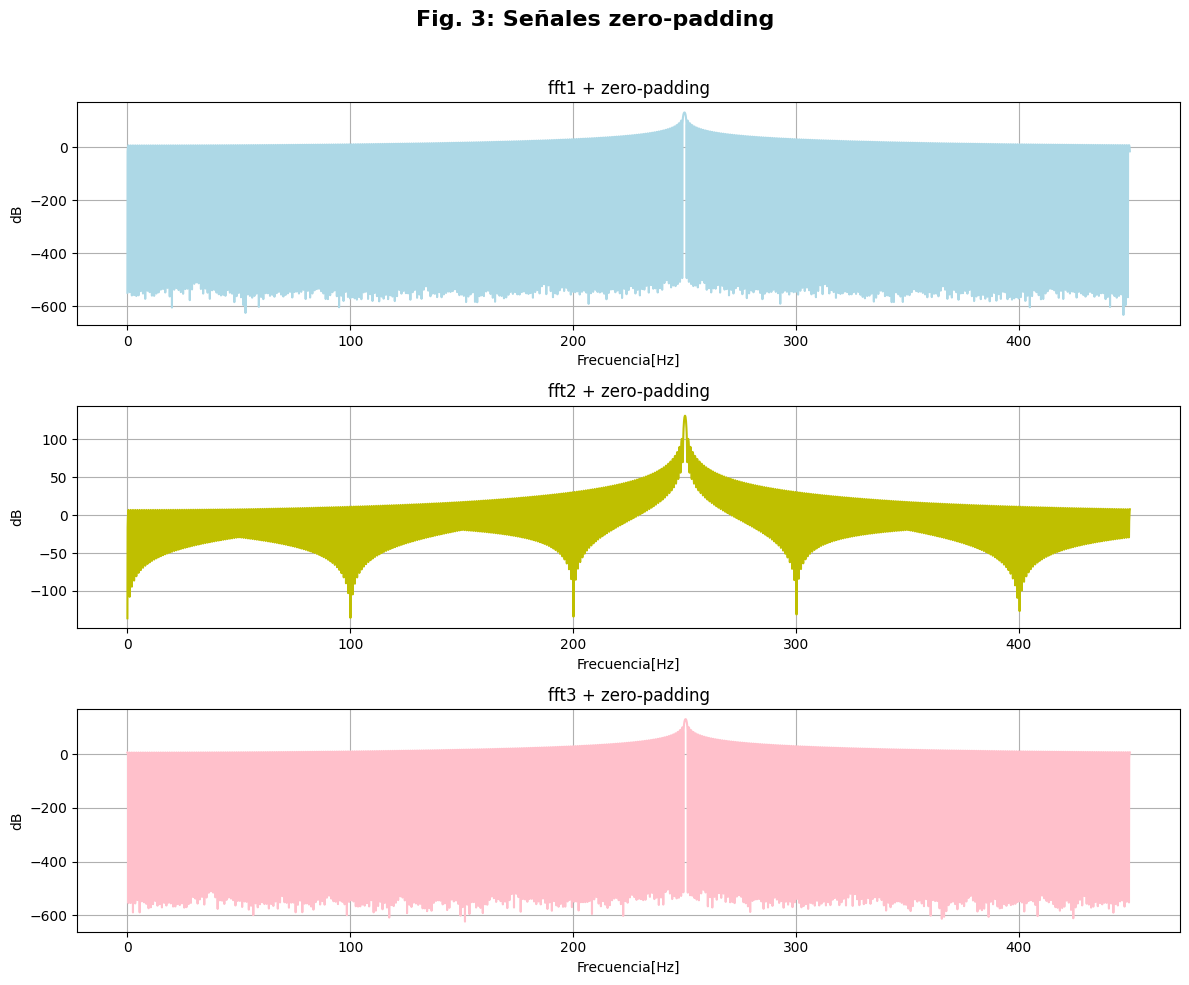

C:\Users\magui\AppData\Local\Temp\ipykernel_22496\1175989970.py:53: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


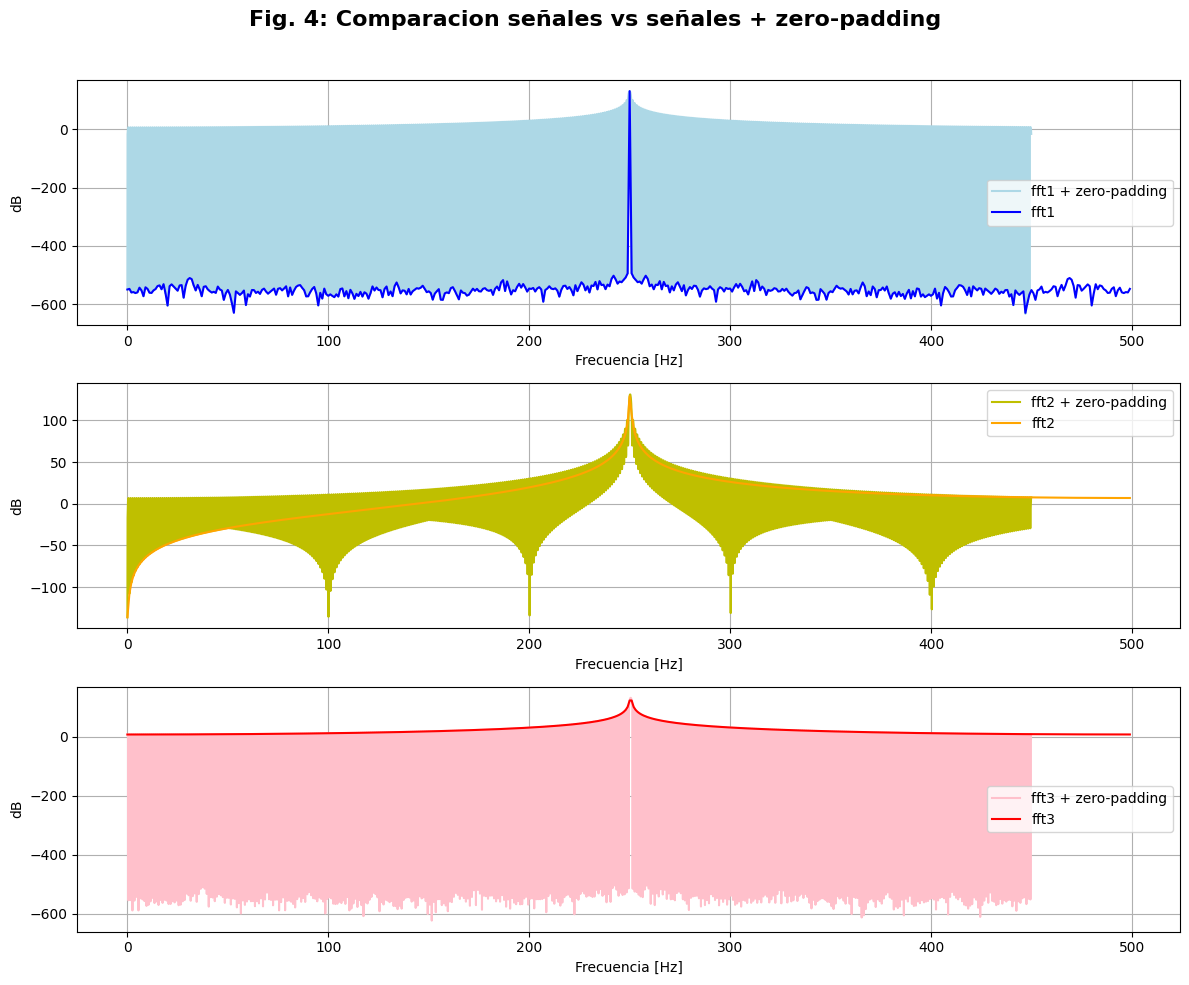

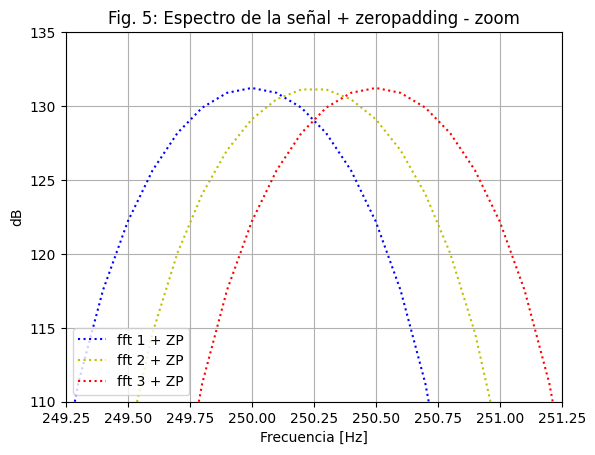

In [32]:
#%% DEFS FUNCIONES

df2 = fs / (9*N)

## SEÑALES SENO + ZERO-PADDING 
zeros = np.zeros(9*N, dtype= complex)
xz = np.concat((xx, zeros))
xz2 = np.concat((xx2,zeros))
xz3 = np.concat((xx3, zeros))

##fft + vector frecs
Xz_fft = np.abs(np.fft.fft(xz))
Xz2_fft = np.abs(np.fft.fft(xz2))
Xz3_fft = np.abs(np.fft.fft(xz3))
frecs2 = np.arange(10*N) * fs / (10*N)

#%% GRAFICO: MODULO zeropad

senales = [
    ("fft1 + zero-padding", frecs2[:9*N//2], 10* np.log(Xz_fft[:9*N // 2]**2), 'lightblue'),
    ("fft2 + zero-padding", frecs2[:9*N//2], 10* np.log(Xz2_fft[:9*N // 2]**2), 'y'),
    ("fft3 + zero-padding", frecs2[:9*N//2], 10* np.log(Xz3_fft[:9*N // 2]**2), 'pink'),
]
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=False)
axs = axs.flatten()
for i, (titulo, tiempo, señal, color) in enumerate(senales):
    axs[i].plot(tiempo, señal, color=color)
    axs[i].set(title=titulo, xlabel="Frecuencia[Hz]", ylabel="dB")
    axs[i].grid(True)
fig.suptitle("Fig. 3: Señales zero-padding", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

senales = [
    ("fft1 + zero-padding", frecs2[:9*N//2], 10* np.log(Xz_fft[:9*N // 2]**2), 'lightblue'),
    ("fft1 ", frecs[:N//2], 10* np.log(X1_fft[:N//2]**2), 'b'),
    ("fft2 + zero-padding", frecs2[:9*N//2], 10* np.log(Xz2_fft[:9*N // 2]**2), 'y'),
    ("fft2", frecs[:N//2], 10* np.log(X2_fft[:N//2]**2), 'orange'),
    ("fft3 + zero-padding", frecs2[:9*N//2], 10* np.log(Xz3_fft[:9*N // 2]**2), 'pink'),
    ("fft3", frecs[:N//2], 10* np.log(X3_fft[:N//2]**2), 'r'),
]

fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=False)
grupos = [(0, 1), (2, 3), (4, 5)]
for ax, (i1, i2) in zip(axs, grupos):
    for i in [i1, i2]:
        titulo, tiempo, señal, color = senales[i]
        ax.plot(tiempo, señal, color=color, label=titulo)
    ax.set(xlabel="Frecuencia [Hz]", ylabel="dB")
    ax.grid(True)
    ax.legend()
fig.suptitle("Fig. 4: Comparacion señales vs señales + zero-padding", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.figure()
plt.plot(frecs2[:9*N//2], 10* np.log(Xz_fft[:9*N//2]**2) ,':', color = 'b', label='fft 1 + ZP')
plt.plot(frecs2[:9*N//2], 10* np.log(Xz2_fft[:9*N//2]**2) ,':', color = 'y', label='fft 2 + ZP')
plt.plot(frecs2[:9*N//2], 10* np.log(Xz3_fft[:9*N//2]**2) ,':', color = 'r', label='fft 3 + ZP')
plt.legend(loc = 'lower left')
plt.xlim(249.25,251.25)
plt.ylim(110,135)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('dB')
plt.title('Fig. 5: Espectro de la señal + zeropadding - zoom')
plt.grid(True)

La Fig. 3 muestra las funciones con el agregado del *zero-padding*, en la Fig. 4, se las puede ver en comparacion con las señales originales y el la Fig. 5, se ven los picos maximos de las señales con zeropadding en una escala reducida. Anteriormente, se menciono que el causante del desparramo espectral era el valor de los parametro $N$ y $f_{s}$, que definen a la resolucion espectral. Ahora, $N_{2}$, toma un valor de $N_{2} = N + 9*N = 10*N = 10000$, la resolucion espectral $\varDelta_{f2} = 0.1Hz$. Lo que significa que en la misma distancia que antes habia 2 puntos, ahora hay 10 puntos, se aumento la resolucion espectral. Esto, se ve reflejado en todos los graficos, ya que vemos mayor definicion en los maximos y un aumento en la diferencia entre estos y el piso de ruido.  

Se imprime tambien el resultado del calculo de la corroboracion de la Identidad de Parseval. Se diseno una funcion que, con una señal de entrada como variable, calcula las energias temporales y frecuenciales y las compara. 

In [35]:
##Parseval
def verf_Pars(xx):
    N = len(xx)
    Et = np.sum(np.abs(xx)**2) 
    X_fft= np.abs(np.fft.fft(xx))
    Ef = 1/N * np.sum(X_fft**2) 
    verf_Pars = Et - Ef
    return verf_Pars

## Aplicacion señales
V1 = verf_Pars(xx)
V2 = verf_Pars(xx2)
V3 = verf_Pars(xx3)
V4 = V3 + V2

## Resultado señales
print(f"Id de Parseval para señal xx= {V1}")
print(f"Id de Parseval para señal xx2= {V2}")
print(f"Id de Parseval para señal xx3= {V3}")
print(f"Suma entre V2 + V3 = {V4}")

## Aplicacion señales + zeropad
V4z = verf_Pars(xz)
V5z = verf_Pars(xz2)
V6z = verf_Pars(xz3)
V7 = V6z + V5z

## Resultado señales + zeropad
print(f"Id de Parseval para señal xz= {V4z}")
print(f"Id de Parseval para señal xz2= {V5z}")
print(f"Id de Parseval para señal xz3= {V6z}")
print(f"Suma entre V6z + V5z = {V7}")

Id de Parseval para señal xx= 1.1368683772161603e-13
Id de Parseval para señal xx2= 2.2737367544323206e-13
Id de Parseval para señal xx3= -2.2737367544323206e-13
Suma entre V2 + V3 = 0.0
Id de Parseval para señal xz= 0.0
Id de Parseval para señal xz2= -1.1368683772161603e-13
Id de Parseval para señal xz3= 1.1368683772161603e-13
Suma entre V6z + V5z = 0.0


Los resultados que imprime la funcion son los esperados. Aunque, la diferencia entre las energias no sea directamente cero, un error del orden de menos trece, se lo puede considerar lo suficientemente cercano a cero. Este error es numerico o computacional, se puede dar por la funcion *np.sum* elegida para sumar los valores de la energia o el redondeo en la FFT, no es un error teorico. Se observa, que en la tercer y en la ultima linea imprime la suma entre la verificacion de la Identidad de Parseval entre algunas señales, curiosamente, da cero. La identidad de Parseval, no depende del valor de la frecuencia teoricamente, pero en la practica, podria influenciar. Se hicieron un par de pruebas, para verificar si la distancia al $\varDelta_{f}$ mas proximo influenciaba, pero no se puedo encontrar un patron. Igualmenteme, no se lo considera una casualidad, sino que, hay una razon que no se pudo verificar.

Se analizaron tres señales senoidales para estudiar el fenomeno de *desparramo espectral*, evidenciando cuando las frecuencias no completan un numero entero de ciclos en la ventana de analisis. Se aplico *zero-padding* para mejorar la resolucion espectral sin alterar el contenido original, lo que permitio visualizar con mayor detalle los picos y lobulos laterales. Finalmente, se verifico la *Identidad de Parseval*, confirmando la conservacion de energi entre los dominios temporales y frecuenciales, con errores numericos despreciables.